In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
def age_category(age):
    if age <= 30:
        return "Young"
    
    elif age <= 50:
        return "Adult"
    
    else:
        return "Aged"

In [ ]:
employee = pd.read_excel(r"C:\Users\bhawa\OneDrive\Desktop\da data\DA Notes\Datasets\Individual files\Employee_Data.xlsx")

In [ ]:
employee['EEID'].drop_duplicates(inplace= True)
employee['Full Name'] = employee['Full Name'].ffill()
employee['Job Title'] = employee['Job Title'].ffill()
employee['Department'] = employee['Department'].ffill()
employee['Age'] = employee['Age'].fillna(employee["Age"].mean())
employee['Annual Salary'] = employee['Annual Salary'].fillna(employee["Annual Salary"].mean())
employee['Hire Year'] = employee['Hire Date'].dt.year
employee['Hire Month'] = employee['Hire Date'].dt.month_name()
employee['Exit Year'] = employee['Exit Date'].dt.year
employee['Exit Month'] = employee['Exit Date'].dt.month_name()
employee['Age Category'] = employee['Age'].apply(func=age_category)

In [ ]:
employee['Hire Year'].unique()

In [ ]:
bins = [1990, 2000, 2010, 2020, 2030]  # upper limit exclusive unless right=False
labels = ['1990-2000', '2001-2010', '2011-2020', '2021-2030']
employee['Hire Year Bin'] = pd.cut(
    employee['Hire Year'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
 )


In [ ]:
employee.columns

In [ ]:
em_ret = employee['Hire Year'].value_counts()

In [ ]:
em_ret.sort_values(inplace= True)

In [ ]:
plt.figure(figsize=(10, 5))

# Plot with markers
plt.plot(em_ret.index, em_ret.values, marker='o', linestyle='-', color='steelblue')

# Add value labels on each point
for x, y in zip(em_ret.index, em_ret.values):
    plt.text(x, y + 0.5, f'{y:.1f}', ha='center', va='bottom', fontsize=9, color='black')

plt.title("Employee Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# How many department are there ?
employee['Department'].unique().size

In [ ]:
# What is the disctribution of employees  department wise
sns.set(style='whitegrid')

# Define a beautiful pastel color palette
custom_palette = sns.color_palette("Set2")  # You can try 'pastel', 'husl', 'Set3', etc.

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=employee, x='Department', palette=custom_palette)

# Add count labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{height}', 
        (bar.get_x() + bar.get_width() / 2., height),
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', xytext=(0, 5),
        textcoords='offset points'
    )

# Improve plot aesthetics
plt.title("🧑‍💼 Employee Count by Department", fontsize=14, fontweight='bold', color='#333')
plt.xlabel("Department", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# What is the disctribution of employees  department wise
sns.set(style='whitegrid')

# Define a beautiful pastel color palette
custom_palette = sns.color_palette("Set2")  # You can try 'pastel', 'husl', 'Set3', etc.

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=employee, x='Hire Year Bin', palette=custom_palette)

# Add count labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{height}', 
        (bar.get_x() + bar.get_width() / 2., height),
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', xytext=(0, 5),
        textcoords='offset points'
    )

# Improve plot aesthetics
plt.title("🧑‍💼 Employee Count by Department", fontsize=14, fontweight='bold', color='#333')
plt.xlabel("Department", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
employee.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Hire Year,Hire Month,Exit Year,Exit Month,Age Category,Hire Year Bin
0,E00005,RILEY WASHINGTON,Director,Sales,Speciality Products,Female,Caucasian,39.0,2007-04-29,171487.0,0.23,United States,Phoenix,NaT,2007,April,NaN,NaN,Adult,2001-2010
1,E00013,ELENA VANG,Analyst,Finance,Corporate,Female,Asian,52.0,2019-02-19,55859.0,0.00,China,Beijing,NaT,2019,February,NaN,NaN,Aged,2011-2020
2,E00022,ELENA HER,Account Representative,Sales,Manufacturing,Female,Asian,62.0,2006-09-17,64669.0,0.00,China,Chongqing,NaT,2006,September,NaN,NaN,Aged,2001-2010
3,E00023,GABRIEL JOSEPH,Director,Engineering,Manufacturing,Male,Caucasian,52.0,2006-10-28,187992.0,0.28,United States,Miami,NaT,2006,October,NaN,NaN,Aged,2001-2010
4,E00034,CAROLINE HERRERA,Sr. Manger,Marketing,Manufacturing,Female,Latino,45.0,2004-08-19,121065.0,0.15,Brazil,Rio de Janerio,NaT,2004,August,NaN,NaN,Adult,2001-2010


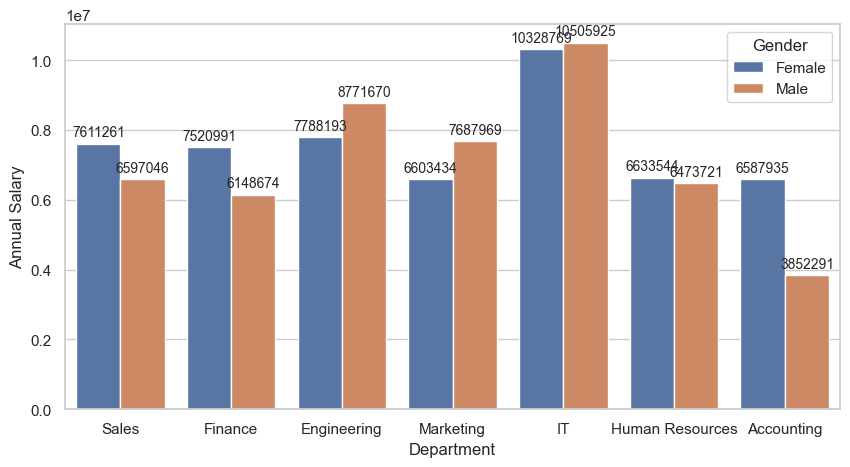

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(employee, x = 'Department',  y = 'Annual Salary', estimator= 'sum', errorbar = None, hue= 'Gender')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)
plt.show()

In [66]:
department_expenses = employee.pivot_table(index='Department', aggfunc= {'Annual Salary' : 'sum'})['Annual Salary']

In [70]:
department_expenses

Department
Accounting         1.044023e+07
Engineering        1.655986e+07
Finance            1.366966e+07
Human Resources    1.310726e+07
IT                 2.083469e+07
Marketing          1.429140e+07
Sales              1.420831e+07
Name: Annual Salary, dtype: float64

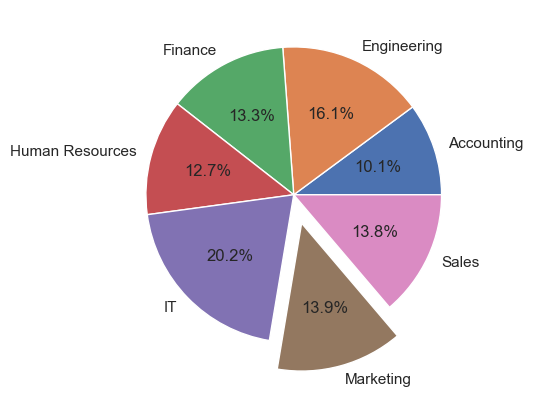

In [80]:
plt.pie(department_expenses.values, labels= department_expenses.index, 
        autopct='%0.1f%%', explode=[0, 0, 0, 0, 0, 0.2, 0])
plt.show()

In [39]:
employee.sort_values(by = 'Age', inplace= True)

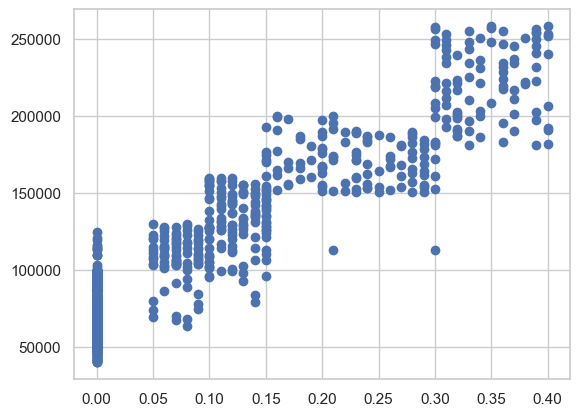

In [41]:
plt.scatter(employee['Bonus %'], employee['Annual Salary'])


<Axes: xlabel='Age', ylabel='Annual Salary'>

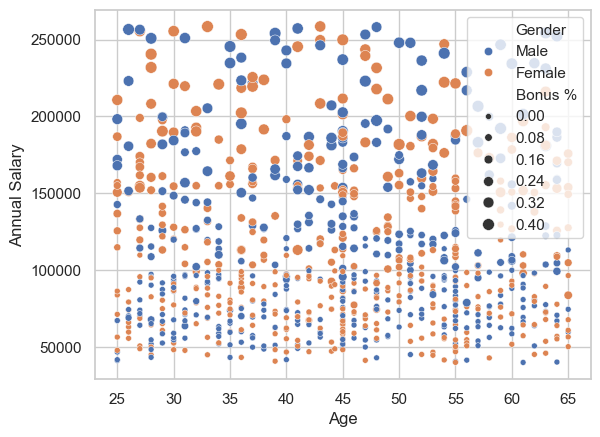

In [42]:
sns.scatterplot(data=employee, x='Age', y='Annual Salary', hue='Gender', size='Bonus %')


<Axes: ylabel='Annual Salary'>

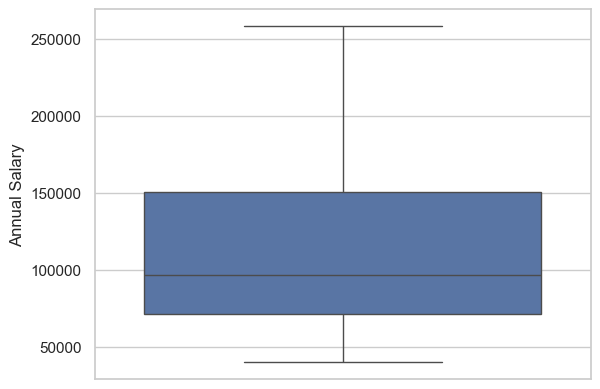

In [48]:
sns.boxplot(employee, y = 'Annual Salary')

<Axes: xlabel='Annual Salary', ylabel='Density'>

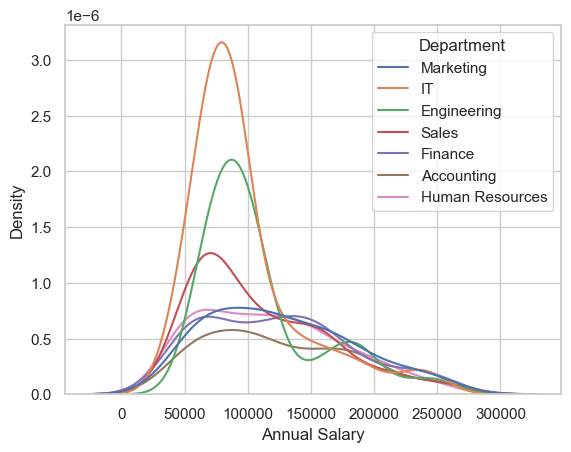

In [55]:
sns.kdeplot(employee , x = 'Annual Salary', hue = 'Department')

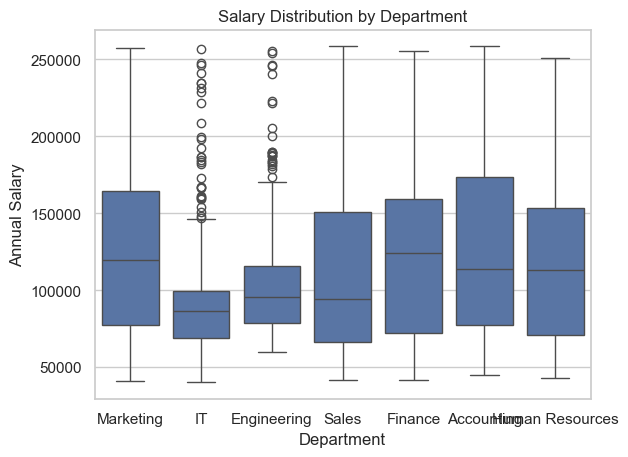

In [ ]:
sns.boxplot(data=employee, x='Department', y='Annual Salary')
plt.title("Salary Distribution by Department")
plt.show()
